In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import numpy as np


In [2]:
xr_df = xr.open_dataset('data/cr2met_v1_mon_1979_2016/pr.nc', decode_times=False)
xr_df

<xarray.Dataset>
Dimensions:  (lat: 800, lon: 220, time: 456)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 ... 453.0 454.0 455.0 456.0
  * lon      (lon) float64 -76.97 -76.92 -76.87 -76.82 ... -66.12 -66.07 -66.02
  * lat      (lat) float64 -56.97 -56.92 -56.87 -56.82 ... -17.12 -17.07 -17.02
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    creation_date:     26-Apr-2018 11:10:01
    authors:           Boisier et al.
    par_order:         1.5
    par_npredictor:    50
    par_use_logit:     1
    par_ens_size:      10
    par_min_quantile:  0
    par_max_quantile:  1
    par_min_stneff:    50
    par_REGlats_1:     -17:-18
    par_REGlats_2:     -18:-19
    par_REGlats_3:     -19:-20
    par_REGlats_4:     -20:-21
    par_REGlats_5:     -21:-22
    par_REGlats_6:     -22:-23
    par_REGlats_7:     -23:-24
    par_REGlats_8:     -24:-25
    par_REGlats_9:     -25:-26
    par_REGlats_10:    -26:-27
    par_REGlats_11:    -27:-28
    par_REGlats_12:    -28:-29
    par_REGlats_13:    -29:-30
    par_REGlats_14:    -30:-31
    par_REGlats_15:    -31:-32
    par_REGlats_16:    -32:-33
    par_REGlats_17:    -33:-34
    par_REGlats_18:    -34:-35
    par_REGlats_19:    -35:-36
    par_REGlats_20:    -36:-37
    par_REGlats_21:    -37:-38
    par_REGlats_22:    -38:-39
    par_REGlats_23:    -39:-40
    par_REGlats_24:    -40:-41
    par_REGlats_25:    -41:-42
    par_REGlats_26:    -42:-43
    par_REGlats_27:    -43:-44
    par_REGlats_28:    -44:-45
    par_REGlats_29:    -45:-46
    par_REGlats_30:    -46:-47
    par_REGlats_31:    -47:-48
    par_REGlats_32:    -48:-49
    par_REGlats_33:    -49:-50
    par_REGlats_34:    -50:-51
    par_REGlats_35:    -51:-52
    par_REGlats_36:    -52:-53
    par_REGlats_37:    -53:-54
    par_REGlats_38:    -54:-55
    par_REGlats_39:    -55:-56
    par_dist_short:    5 km
    par_dist_long:     30 km

C:\Users\bmati\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [3]:
np.nanmax(xr_df['pr'].values)

2564.59

In [4]:
anomaly.isel(time=455)

NameError: name 'anomaly' is not defined

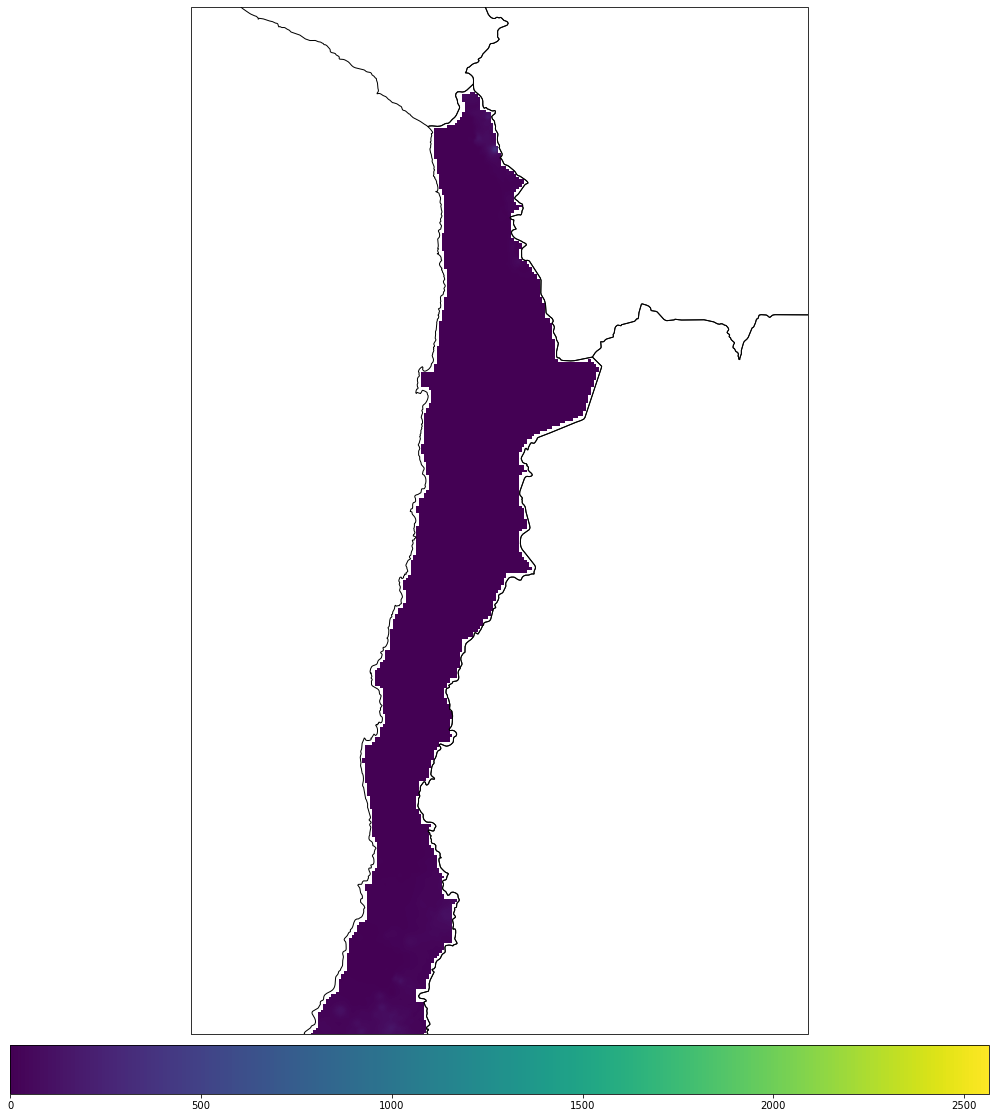

In [52]:
#Downsample the time series to yearly frequency.
#climate = xr_df.resample(time='Y').mean()
anomaly = xr_df['pr']

#Creating a static image of the global temperature anomaly for a given year.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-63, -75, -36, -16])


#date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
#ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=455).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=np.nanmin(xr_df['pr'].values), vmax=np.nanmax(xr_df['pr'].values), cmap='viridis',cbar_kwargs=cbar_kwargs,interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()

<ipython-input-89-099b9f724e2b>:18: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


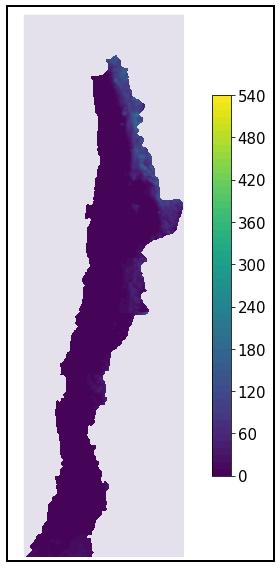

In [89]:

lats = xr_df['lat'].values
sst = xr_df['pr'].values[0,:,:]
fig.patch.set_facecolor('#e4e1ed')
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(10,10))


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-67, -72.9, -36, -16])
ax.outline_patch.set_edgecolor('white')

z1_plot = plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

plt.colorbar(ax=ax, shrink=.7)
ax.set_facecolor('#e4e1ed')


rect = plt.Rectangle(
    # (lower-left corner), width, height
    (.5, .12), 0.37, 0.77, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

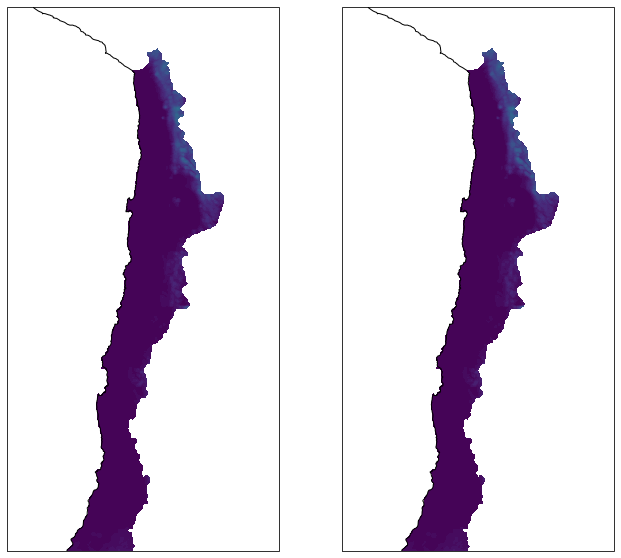

In [71]:
lons = xr_df['lon'].values
lats = xr_df['lat'].values
sst = xr_df['pr'].values[0,:,:]


#fig = plt.figure(figsize=(10,10))


fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,10))
ax = ax.flatten()
ax[0].set_extent([-65, -75, -36, -16])
ax[0].contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())
ax[0].coastlines()


ax[1].set_extent([-65, -75, -36, -16])
ax[1].contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())
ax[1].coastlines()

#location = 'bottom',
plt.colorbar(ax=[ax[0], ax[1]], shrink=.98, orientation = 'horizontal')
plt.show()

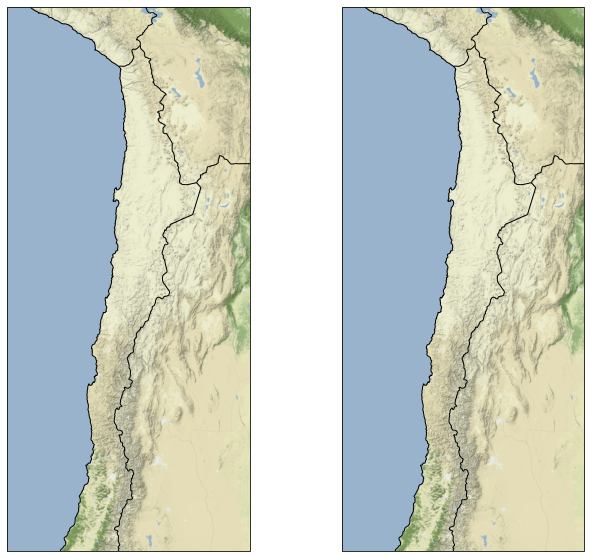

In [106]:
import cartopy.io.img_tiles as cimgt
from matplotlib.transforms import offset_copy
import cartopy.feature as cf

import cartopy.io.shapereader as shapereader

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

for country in shapereader.Reader(countries).records():
    if country.attributes['ADM0_A3'] == 'CHL':
        chile = country.geometry
        break

stamen_terrain = cimgt.Stamen('terrain-background')

fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': stamen_terrain.crs},
                        figsize=(11,10))
ax = ax.flatten()

ax[0].set_extent([-65, -75, -36, -16])
ax[0].coastlines()
ax[0].add_image(stamen_terrain, 8)
ax[0].add_feature(cf.BORDERS)
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax[0])
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)


ax[1].set_extent([-65, -75, -36, -16])
ax[1].add_image(stamen_terrain, 8)
ax[1].add_feature(cf.BORDERS)
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax[1])
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)
ax[1].coastlines()

plt.show()